In [3]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K

In [4]:
def build(width, height, depth, classes):
	# initialize the model along with the input shape to be
	# "channels last" and the channels dimension itself
	model = Sequential()
	inputShape = (height, width, depth)
	chanDim = -1
 
	# if we are using "channels first", update the input shape
	# and channels dimension
	if K.image_data_format() == "channels_first":
		inputShape = (depth, height, width)
		chanDim = 1
        
	# CONV => RELU => POOL
	model.add(Conv2D(32, (3, 3), padding="same",
		input_shape=inputShape))
	model.add(Activation("relu"))
	model.add(BatchNormalization(axis=chanDim))
	model.add(MaxPooling2D(pool_size=(3, 3)))
	model.add(Dropout(0.25))
	# (CONV => RELU) * 2 => POOL
	model.add(Conv2D(64, (3, 3), padding="same"))
	model.add(Activation("relu"))
	model.add(BatchNormalization(axis=chanDim))
	model.add(Conv2D(64, (3, 3), padding="same"))
	model.add(Activation("relu"))
	model.add(BatchNormalization(axis=chanDim))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.25))
	# (CONV => RELU) * 2 => POOL
	model.add(Conv2D(128, (3, 3), padding="same"))
	model.add(Activation("relu"))
	model.add(BatchNormalization(axis=chanDim))
	model.add(Conv2D(128, (3, 3), padding="same"))
	model.add(Activation("relu"))
	model.add(BatchNormalization(axis=chanDim))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.25))
	# first (and only) set of FC => RELU layers
	model.add(Flatten())
	model.add(Dense(1024))
	model.add(Activation("relu"))
	model.add(BatchNormalization())
	model.add(Dropout(0.5))
 
	# softmax classifier
	model.add(Dense(classes))
	model.add(Activation("softmax"))
 
	# return the constructed network architecture
	return model

In [ ]:
def buil1(width, height, depth, classes)

    num_features = 64
    num_labels = 7
    inputShape = (width, height, 1)
    width, height = 48, 48
               
    model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', input_shape=inputShape, 
              data_format='channels_last', kernel_regularizer=l2(0.01)))
    model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization() 
    model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.5))

    model.add(Flatten())

    model.add(Dense(2*2*2*num_features, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(2*2*num_features, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(2*num_features, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(classes, activation='softmax'))
              
    return model

In [5]:
#import the necessary packages
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from keras.models import model_from_json
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imutils import paths
import numpy as np
import argparse
import random
import pickle
import cv2
import os

In [6]:
# initialize the number of epochs to train for, initial learning rate,
# batch size, and image dimensions

IMAGE_DIMS = (96, 96, 3)
 
# initialize the data and labels
data = []
labels = []
 
# grab the image paths and randomly shuffle them
print("[INFO] loading images...")
path = '/home/jorgel/Documents/CFEE'
imagePaths = sorted(list(paths.list_images(path)))
random.seed(42)
random.shuffle(imagePaths)

[INFO] loading images...


In [7]:
#loop over the input images
for imagePath in imagePaths:
    # load the image, pre-process it, and store it in the data list
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (IMAGE_DIMS[1], IMAGE_DIMS[0]))
    image = img_to_array(image)
    
    data.append(image)
 
    # extract the class label from the image path and update the
    # labels list
    label = imagePath.split(os.path.sep)[-2]
    
    labels.append(label)

In [8]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)
print("[INFO] data matrix: {:.2f}MB".format(
    data.nbytes / (1024 * 1000.0)))
data
 
# binarize the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print("labels {}".format(labels))
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.2, random_state=42)

[INFO] data matrix: 347.76MB
labels [[0 0 0 ... 0 1 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


In [9]:
print("Size {}".format(len(labels)))
print(labels.shape)
print(trainX.shape, trainX.shape)
print(testX.shape, testY.shape)

Size 1610
(1610, 7)
(1288, 96, 96, 3) (1288, 96, 96, 3)
(322, 96, 96, 3) (322, 7)


In [10]:
# construct the image generator for data augmentation
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,height_shift_range=0.1, 
                         shear_range=0.2, zoom_range=0.2,horizontal_flip=True, fill_mode="nearest")

In [19]:
EPOCHS = 50
INIT_LR = 1e-3
BS = 64

# initialize the model
print("[INFO] compiling model...")
model = build(width=IMAGE_DIMS[1], height=IMAGE_DIMS[0],depth=IMAGE_DIMS[2], classes=len(lb.classes_))
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])


[INFO] compiling model...


In [24]:
# train the network
print("[INFO] training network...")
#H = model.fit_generator(aug.flow(trainX, trainY, batch_size=BS),validation_data=(testX, testY),
#                        steps_per_epoch=len(trainX) // BS,epochs=EPOCHS, verbose=1)
H = model.fit(trainX, trainY, batch_size=BS,validation_data=(testX, testY),epochs=EPOCHS, verbose=1)

[INFO] training network...
Train on 1288 samples, validate on 322 samples
Epoch 1/50
1288/1288 [==============================] - 46s 36ms/step - loss: 3.1464 - accuracy: 0.1599 - val_loss: 2.0412 - val_accuracy: 0.1025
Epoch 2/50
1288/1288 [==============================] - 31s 24ms/step - loss: 2.3779 - accuracy: 0.2345 - val_loss: 2.2908 - val_accuracy: 0.1304
Epoch 3/50
1288/1288 [==============================] - 33s 25ms/step - loss: 2.0402 - accuracy: 0.2919 - val_loss: 2.7466 - val_accuracy: 0.1304
Epoch 4/50
1288/1288 [==============================] - 34s 27ms/step - loss: 1.7289 - accuracy: 0.3789 - val_loss: 2.4243 - val_accuracy: 0.1304
Epoch 5/50
1288/1288 [==============================] - 35s 27ms/step - loss: 1.5609 - accuracy: 0.4519 - val_loss: 2.6261 - val_accuracy: 0.1304
Epoch 6/50
1288/1288 [==============================] - 33s 25ms/step - loss: 1.4026 - accuracy: 0.5031 - val_loss: 2.7215 - val_accuracy: 0.1335
Epoch 7/50
1288/1288 [============================

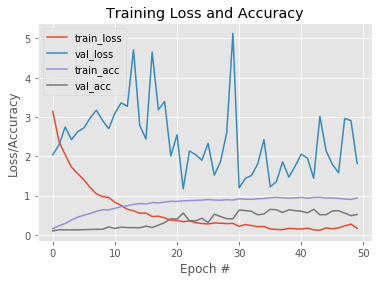

In [25]:
import matplotlib
%matplotlib inline
#matplotlib.use("Agg") 
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
N = EPOCHS
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")
plt.savefig("EmoTrain_1.png")
plt.show()

In [30]:
scores = model.evaluate(trainX, trainY, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 83.31%


(322, 7) (322, 7)
(322,) (322,)
[[37  0  6  1  1  0  0]
 [ 4 41  1  2  2  0  2]
 [32  0 10  0 17  0  1]
 [11  1  2 12  1 15  0]
 [ 5  0  5  1 33  0  1]
 [ 3  0  1  2  1 26  0]
 [ 7  1  1  0 28  0  8]]


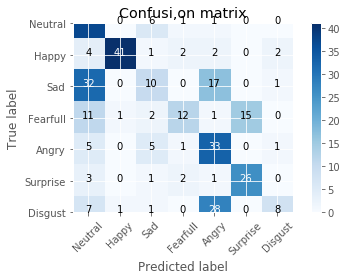

In [29]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_true = testY
y_pred = model.predict(testX)
print(y_true.shape,y_pred.shape)
y_true_m = np.argmax(y_true, axis=1)
y_pred_m = np.argmax(y_pred, axis=1)
print(y_true_m.shape,y_pred_m.shape)

cm = confusion_matrix(y_true_m, y_pred_m)
labels = ['Neutral','Happy','Sad','Fearfull','Angry', 'Surprise', 'Disgust']
title='Confusion matrix'
print(cm)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

In [31]:
from keras.models import model_from_json
# serialize model to JSON
model_json = model.to_json()
with open("EmoClassModel.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("EmoClassWeights.h5")
print("Saved model to disk")

Saved model to disk


In [32]:
# load json and create model
json_file = open('EmoClassModel.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("EmoClassWeights.h5")
print("Loaded model from disk")
print('Model Summary:')
print(loaded_model.summary())

Loaded model from disk
Model Summary:
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 96, 96, 32)        896       
_________________________________________________________________
activation_15 (Activation)   (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_16 (A

In [33]:
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(testX, testY, verbose=1)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

322/322 [==============================] - 2s 7ms/step
accuracy: 51.86%
